In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('train.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bb218ead0>,
      dtype=object)

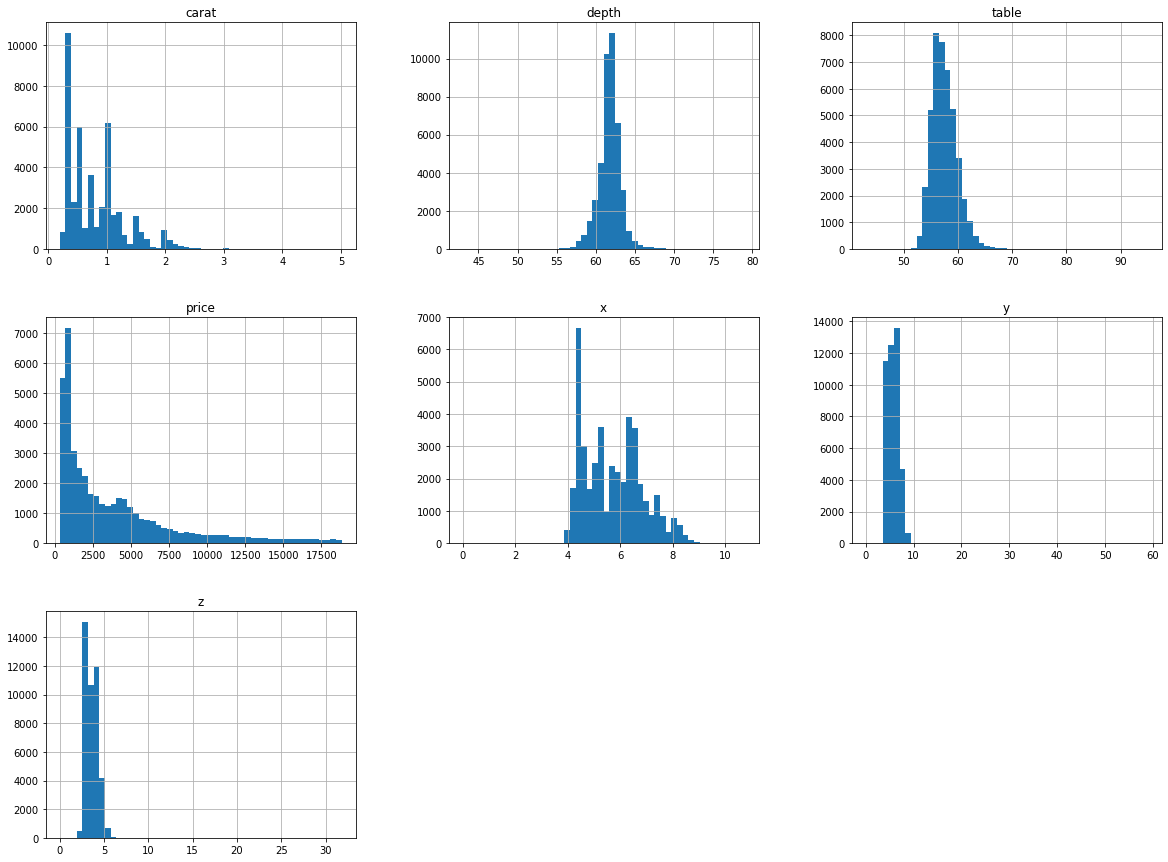

In [10]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

In [11]:
data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [12]:
 data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [13]:
data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [14]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.923801
x        0.887483
y        0.863748
z        0.860625
table    0.136975
depth   -0.014393
Name: price, dtype: float64

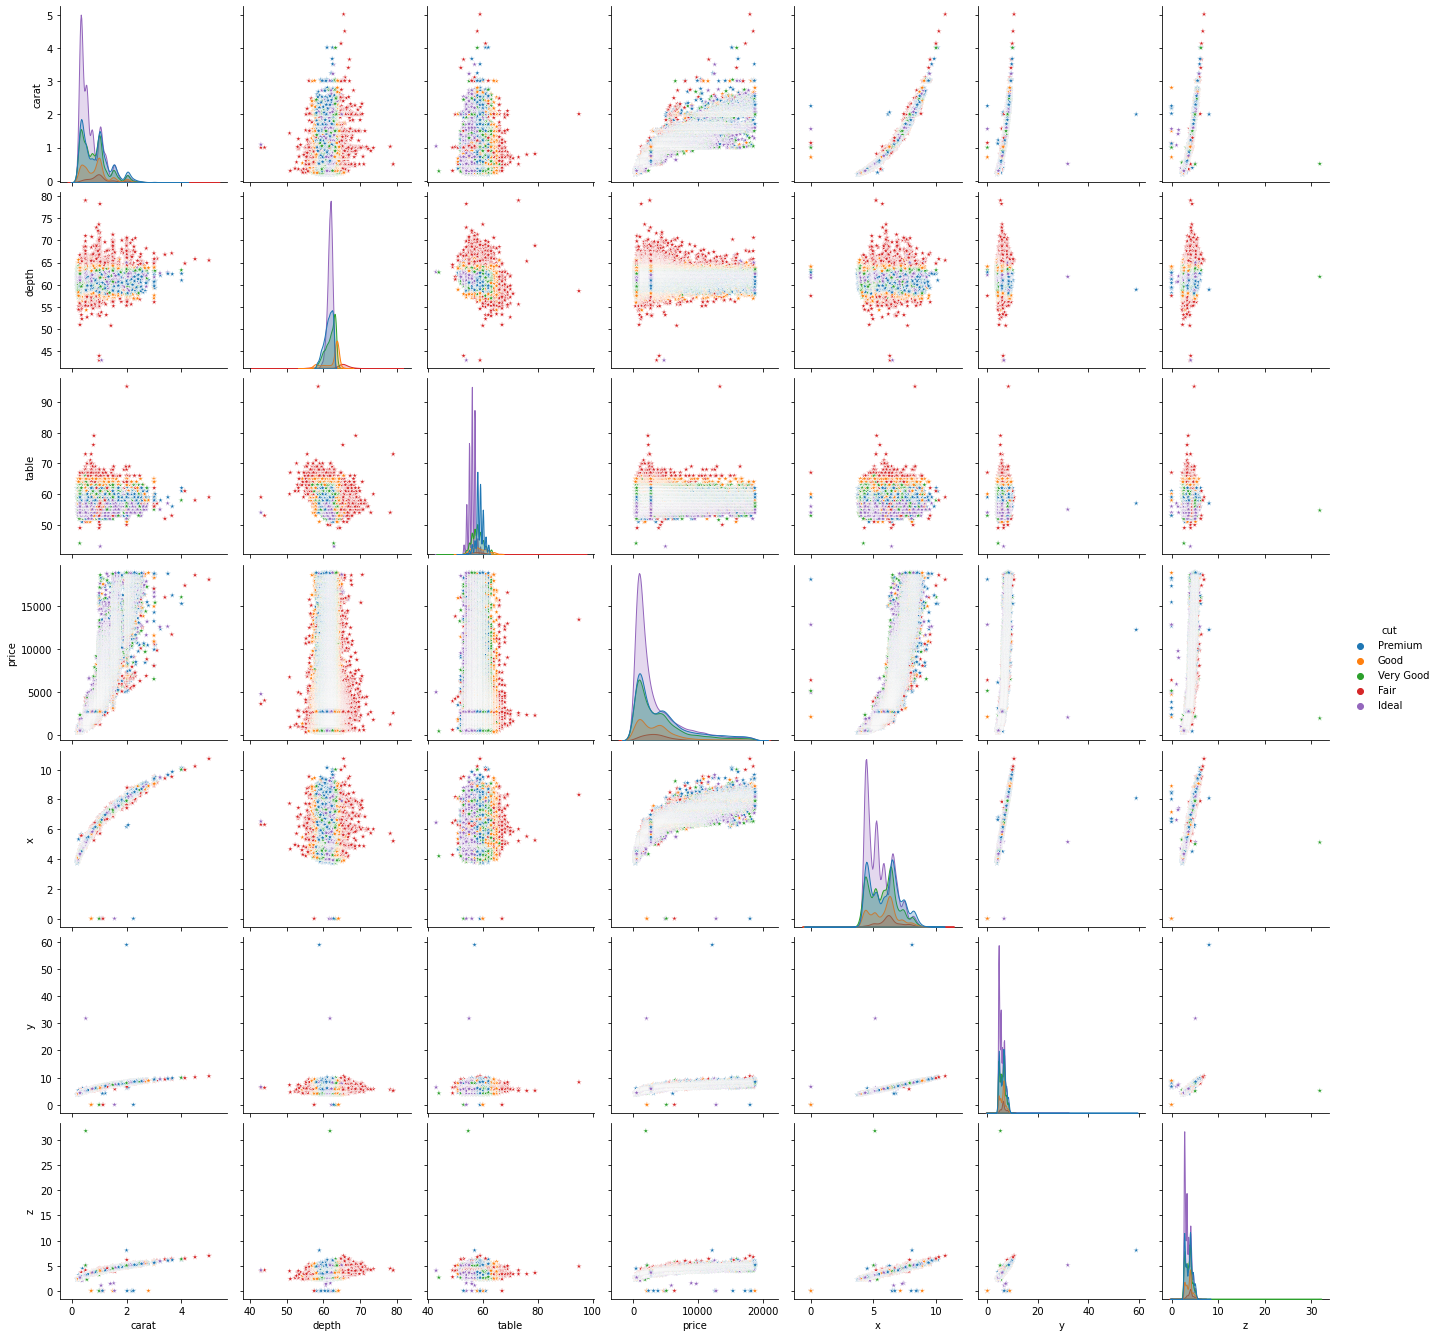

In [15]:
import seaborn as sns
sns.pairplot(data, diag_kind="kde",hue='cut', height=2.7,markers='*')

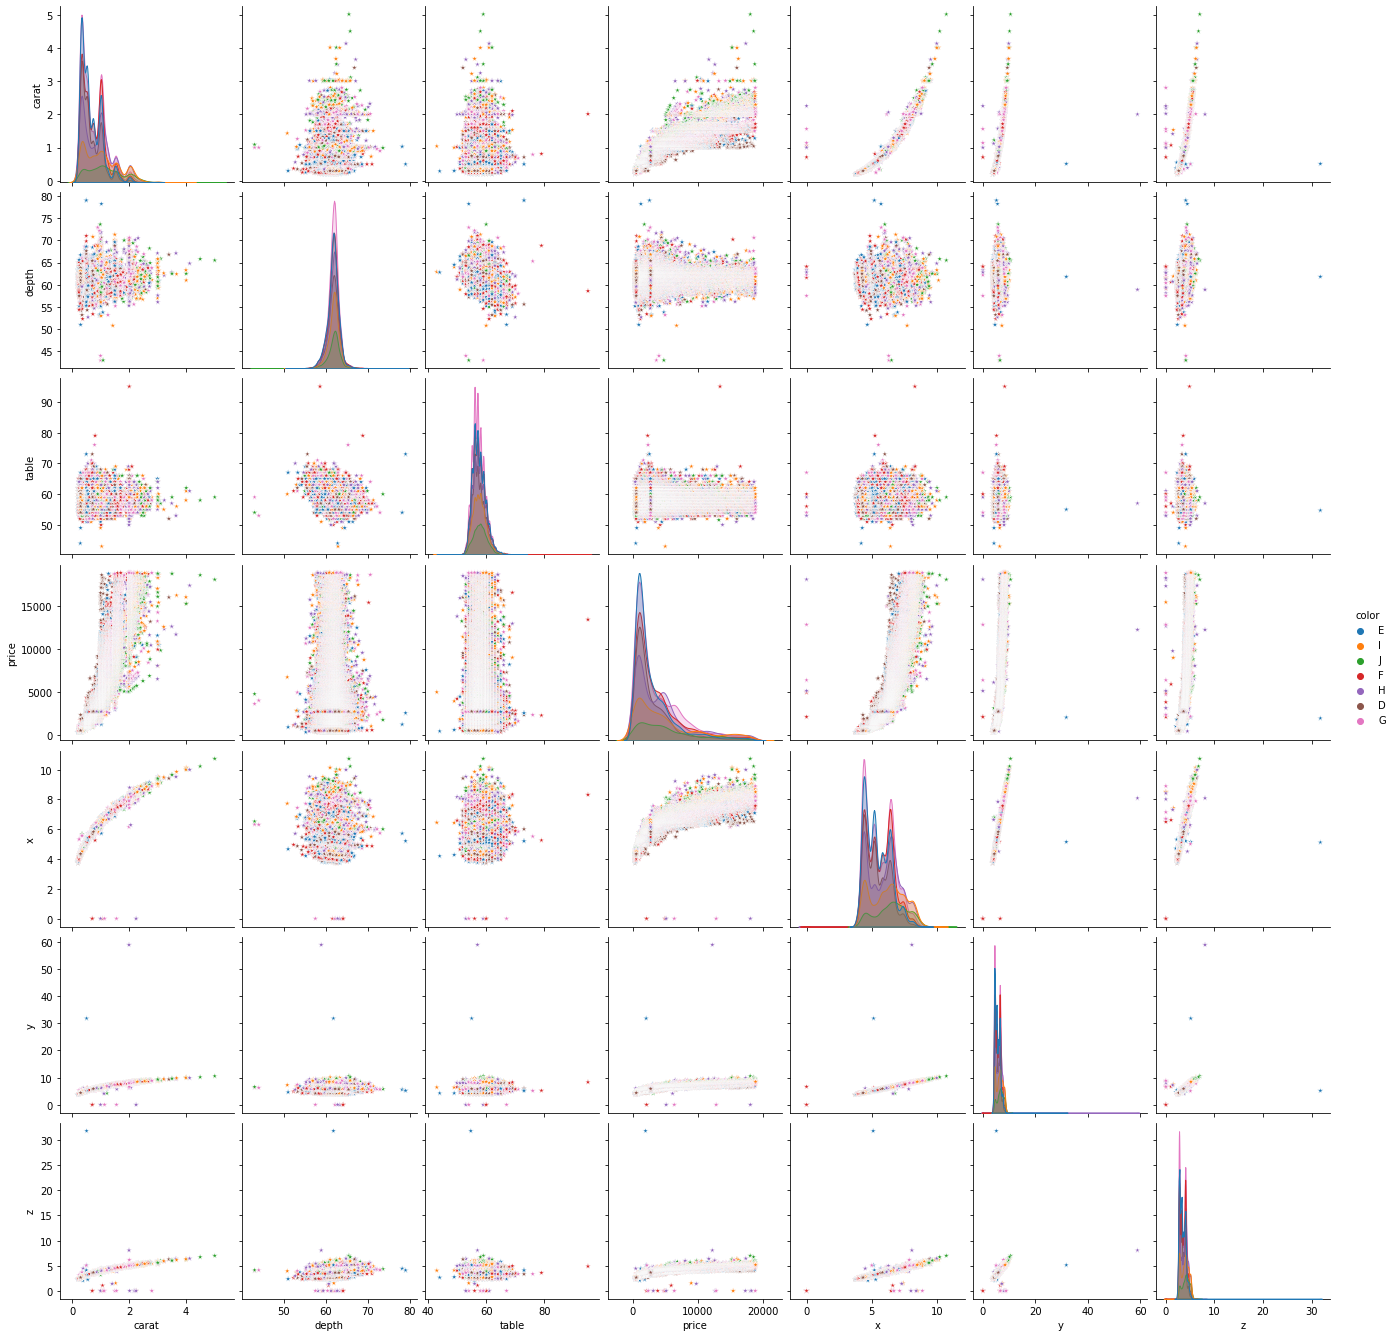

In [16]:
import seaborn as sns
sns.pairplot(data, diag_kind="kde",hue='color', height=2.7,markers='*')

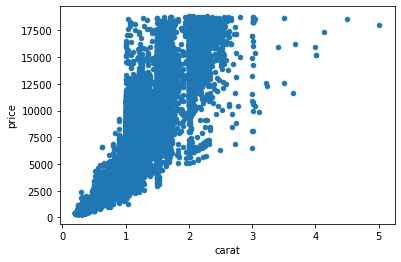

In [17]:
data.plot(kind="scatter", x="carat", y="price")

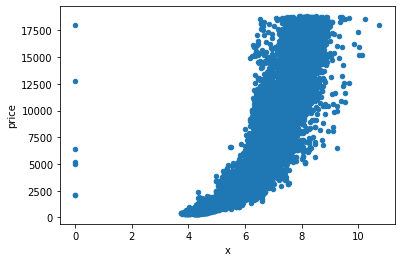

In [18]:
data.plot(kind="scatter", x="x", y="price")

In [19]:
data=data.drop(data[data['x']==0].index)

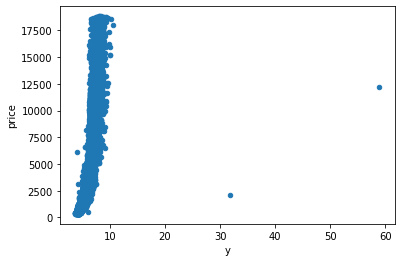

In [20]:
data.plot(kind="scatter", x="y", y="price")

In [21]:
data=data.drop(data[data['y']>30].index)
data=data.drop(data[data['y']==0].index)

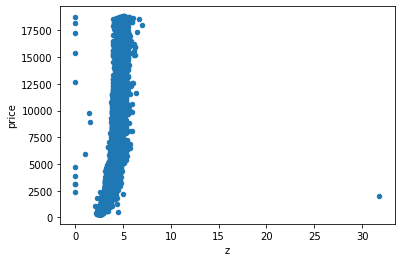

In [22]:
data.plot(kind="scatter", x="z", y="price")

In [23]:
data=data.drop(data[data['z']<2].index)
data=data.drop(data[data['z']>30].index)

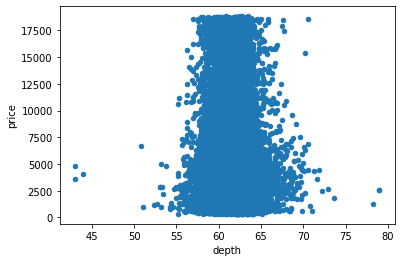

In [24]:
data.plot(kind="scatter", x="depth", y="price")

In [25]:
data=data.drop(data[data['depth']>75].index)
data=data.drop(data[data['depth']<50].index)

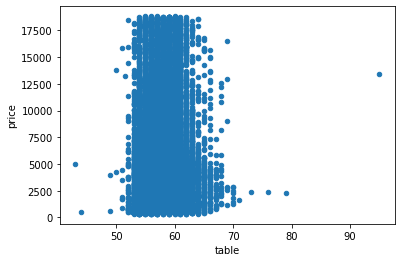

In [26]:
data.plot(kind="scatter", x="table", y="price")

In [49]:
data=data.drop(data[data['table']>80].index)
data=data.drop(data[data['table']<40].index)

In [70]:
data_num_eff=data.drop(['cut','color','clarity','price','volum'],axis=1)
data_num_eff

,carat,depth,table,x,y,z
0,0.21,59.8,61.0,3.89,3.84,2.31
1,0.29,62.4,58.0,4.20,4.23,2.63
2,0.31,63.3,58.0,4.34,4.35,2.75
3,0.24,62.8,57.0,3.94,3.96,2.48
4,0.24,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...
43035,0.72,62.7,59.0,5.69,5.73,3.58
43036,0.72,60.8,57.0,5.75,5.76,3.50
43037,0.72,63.1,55.0,5.69,5.75,3.61
43038,0.86,61.0,58.0,6.15,6.12,3.74


In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="mean")),
 ('std_scaler', StandardScaler()),
 ])

In [54]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num_eff)
cat_attribs = ['cut','color','clarity']
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(), cat_attribs),
 ])

In [55]:
dataProc=data.drop(['price'],axis=1)
dataTarget=data['price'].copy()

In [56]:
dataProc=full_pipeline.fit_transform(dataProc)

In [57]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

LinearRegressionModel=LinearRegression()
RidgeModel=Ridge()
LassoModel=Lasso()
SGDRegressorModel=SGDRegressor()
DecisionTreeRegressorModel=DecisionTreeRegressor()
RandomForestRegressorModel=RandomForestRegressor()
XGBRegressorModel=XGBRegressor()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(dataProc, dataTarget, test_size=0.30, random_state=42, shuffle =True)

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [60]:
LinearRegressionModel.fit(X_train, y_train)
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
LinearRegressionModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
LinearRegressionModel_RMSEValue=np.sqrt(LinearRegressionModel_MSEValue)
print('Mean Squared Error Value is : ',LinearRegressionModel_MSEValue)
print('RMSE is : ',LinearRegressionModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(LinearRegressionModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
LinearRegressionModel_score=np.sqrt(-scores)
display_scores(LinearRegressionModel_score)

Linear Regression Train Score is :  0.8872475593944419
Linear Regression Test Score is :  0.88874781101645
Predicted Value for Linear Regression is :  [ 2414.36863401  3700.00332942  -338.43316117  6613.04638585
 13742.98410233  3186.33596305  -120.64816908  6426.23776161
  5466.01165304   250.34853421]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  1737338.6408206513
RMSE is :  1318.0814241998296
Scores: [1003.87896979 1105.13772203 1163.77749694 1704.16368926 2949.73636096
 1980.15236652  785.42511884  717.11633635  644.2232467   785.59622646]
Mean: 1283.9207533856152
Standard deviation: 691.9834374237854


In [61]:
RidgeModel.fit(X_train, y_train)
#Calculating Details
print('Ridge Model Train Score is : ' , RidgeModel.score(X_train, y_train))
print('Ridge Model Test Score is : ' , RidgeModel.score(X_test, y_test))
#Calculating Prediction
y_pred = RidgeModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for Ridge Model is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
RidgeModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
RidgeModel_RMSEValue=np.sqrt(RidgeModel_MSEValue)
print('Mean Squared Error Value is : ',RidgeModel_MSEValue)
print('RMSE is : ',RidgeModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(RidgeModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
RidgeModel_score=np.sqrt(-scores)
display_scores(RidgeModel_score)

Ridge Model Train Score is :  0.887245616757302
Ridge Model Test Score is :  0.8887610031395815
Predicted Value for Ridge Model is :  [ 2417.4333859   3699.26168788  -340.68536636  6607.98799721
 13748.48602587  3190.40857981  -114.96925436  6429.78451692
  5464.71980398   252.11157719]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  1737132.6297256767
RMSE is :  1318.0032737917143
Scores: [1004.34725083 1105.47526491 1163.57693404 1703.80461224 2949.82343104
 1980.9754551   785.28945032  716.85025136  644.1109167   785.14152567]
Mean: 1283.9395092210193
Standard deviation: 692.1160080754472


In [62]:
LassoModel.fit(X_train, y_train)
#Calculating Details
print('Lasso Model Train Score is : ' , LassoModel.score(X_train, y_train))
print('Lasso Model Test Score is : ' , LassoModel.score(X_test, y_test))
#Calculating Prediction
y_pred = LassoModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for Lasso Model is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
LassoModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
LassoModel_RMSEValue=np.sqrt(LassoModel_MSEValue)
print('Mean Squared Error Value is : ',LassoModel_MSEValue)
print('RMSE is : ',LassoModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(LassoModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
LassoModel_score=np.sqrt(-scores)
display_scores(LassoModel_score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+09, tolerance: 4.938e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso Model Train Score is :  0.886962232875779
Lasso Model Test Score is :  0.8886439829925306
Predicted Value for Lasso Model is :  [ 2458.53704904  3681.0925157   -371.10330892  6549.48742627
 13822.69159086  3245.35337303   -38.08986027  6479.05936302
  5442.40889504   279.46127451]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  1738960.0420677047
RMSE is :  1318.6963418724208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.798e+09, tolerance: 6.872e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.343e+09, tolerance: 6.895e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Scores: [1013.26403195 1110.05147147 1163.34233759 1704.27125766 2956.82426147
 1990.65390714  782.81566199  713.58330916  642.83766668  782.23134453]
Mean: 1285.9875249643164
Standard deviation: 695.1133268260169


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.310e+09, tolerance: 6.783e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [63]:
SGDRegressorModel.fit(X_train, y_train)
#Calculating Details
print('SGD Regressor Model Train Score is : ' , SGDRegressorModel.score(X_train, y_train))
print('SGD Regressor Model Test Score is : ' , SGDRegressorModel.score(X_test, y_test))
#Calculating Prediction
y_pred = SGDRegressorModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for SGDR egressor Model is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
SGDRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
SGDRegressorModel_RMSEValue=np.sqrt(SGDRegressorModel_MSEValue)
print('Mean Squared Error Value is : ',SGDRegressorModel_MSEValue)
print('RMSE is : ',SGDRegressorModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(SGDRegressorModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
SGDRegressorModel_score=np.sqrt(-scores)
display_scores(SGDRegressorModel_score)

SGD Regressor Model Train Score is :  0.8866923499754998
SGD Regressor Model Test Score is :  0.8884830760579833
Predicted Value for SGDR egressor Model is :  [ 2420.99307735  3646.83621036  -412.14519127  6533.0328744
 13869.78825812  3238.47889667   -59.20170071  6460.20907985
  5433.0428967    243.43399243]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  1741472.8001313342
RMSE is :  1319.6487411926457
Scores: [ 964.91099752  985.69152216 1086.08694525 1671.29494319 2950.10291584
 1990.49015206  772.81528096  675.7218848   667.78863925  766.51617007]
Mean: 1253.1419451110282
Standard deviation: 701.733267922227


In [64]:
DecisionTreeRegressorModel.fit(X_train, y_train)
#Calculating Details
print('Decision Tree Regressor Model Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('Decision Tree Regressor Model Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
#Calculating Prediction
y_pred = DecisionTreeRegressorModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for Decision Tree Regressor Model is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
DecisionTreeRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
DecisionTreeRegressorModel_RMSEValue=np.sqrt(DecisionTreeRegressorModel_MSEValue)
print('Mean Squared Error Value is : ',DecisionTreeRegressorModel_MSEValue)
print('RMSE is : ',DecisionTreeRegressorModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(DecisionTreeRegressorModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
DecisionTreeRegressorModel_score=np.sqrt(-scores)
display_scores(DecisionTreeRegressorModel_score)

Decision Tree Regressor Model Train Score is :  0.9999977905115975
Decision Tree Regressor Model Test Score is :  0.9627307949286243
Predicted Value for Decision Tree Regressor Model is :  [ 1640.  2447.   947.  6911. 17692.  3945.   936.  6458.  3601.   720.]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  582004.0996473689
RMSE is :  762.8919318274174
Scores: [ 661.32222104  794.70292252 1046.55625853 1700.75796479 3153.87883817
 1403.11444432  161.59784288  248.41690567  347.76027472  485.25266012]
Mean: 1000.3360332751945
Standard deviation: 860.8106482774477


In [65]:
RandomForestRegressorModel.fit(X_train, y_train)
#Calculating Details
print('Random Forest Regressor Model Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Model Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])
print('actual Value for Linear Regression is : ' , y_actual[:10])
#Calculating Mean Squared Error
RandomForestRegressorModel_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
RandomForestRegressorModel_RMSEValue=np.sqrt(RandomForestRegressorModel_MSEValue)
print('Mean Squared Error Value is : ',RandomForestRegressorModel_MSEValue)
print('RMSE is : ',RandomForestRegressorModel_RMSEValue)
#with cross_val_score
scores = cross_val_score(RandomForestRegressorModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
RandomForestRegressorModel_score=np.sqrt(-scores)
display_scores(RandomForestRegressorModel_score)

Random Forest Regressor Model Train Score is :  0.9972843290162743
Random Forest Regressor Model Test Score is :  0.9798599391479962
Predicted Value for Linear Regression is :  [ 1507.19  2661.7    902.74  6564.76 16248.67  3673.56   828.92  6018.43
  4316.01   705.13]
actual Value for Linear Regression is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  314511.61785085656
RMSE is :  560.8133538449816
Scores: [ 505.26704469  560.61278992  770.677788   1239.54781758 2635.42269331
 1305.3345815   135.72283385  196.56353552  257.92899324  361.96297659]
Mean: 796.904105419603
Standard deviation: 724.8031880768264


In [66]:
XGBRegressorModel.fit(X_train, y_train)
#Calculating Details
print('XGBRegressor Model Train Score is : ' , XGBRegressorModel.score(X_train, y_train))
print('XGBRegressor Model Test Score is : ' , XGBRegressorModel.score(X_test, y_test))
#Calculating Prediction
y_pred = XGBRegressorModel.predict(X_test)
y_actual=list(y_test)
print('Predicted Value for XGBRegressor is : ' , y_pred[:10])
print('actual Value for XGBRegressor is : ' , y_actual[:10])
#Calculating Mean Squared Error
XGBRegressor_MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
XGBRegressor_RMSEValue=np.sqrt(XGBRegressor_MSEValue)
print('Mean Squared Error Value is : ',XGBRegressor_MSEValue)
print('RMSE is : ',XGBRegressor_RMSEValue)
#with cross_val_score
scores = cross_val_score(XGBRegressorModel, dataProc, dataTarget,scoring="neg_mean_squared_error", cv=10)
XGBRegressor_score=np.sqrt(-scores)
display_scores(XGBRegressor_score)

[19:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Model Train Score is :  0.9736327835815067
XGBRegressor Model Test Score is :  0.9715604107907586
Predicted Value for XGBRegressor is :  [ 1876.2404   2677.4622    969.46606  6910.7856  15093.76     3917.011
   757.59656  6187.117    4193.0093    722.9357 ]
actual Value for XGBRegressor is :  [1827, 2460, 865, 6419, 15134, 3751, 854, 6112, 4496, 720]
Mean Squared Error Value is :  444118.8772437271
RMSE is :  666.4224465335236
[19:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:44:24] WARNING: /workspace/src/objective/reg

In [67]:
Dtest=pd.read_csv('test.csv')
Dtest.drop(['Unnamed: 0'],axis=1,inplace=True)
Dtest['volum']=Dtest['x']*Dtest['y']*Dtest['z']
Dtest_num = Dtest.drop(['color','cut','clarity'], axis=1)
num_attribs = list(Dtest_num)
cat_attribs = ["cut","color","clarity"]
Dtest_prepared = full_pipeline.transform(Dtest)
pridections=RandomForestRegressorModel.predict(Dtest_prepared)
pridections

array([ 428.4 ,  401.51,  418.95, ..., 2848.64, 2921.79, 2678.64])

In [68]:
submission=pd.read_csv('sample_submission.csv')
submission['price']=pridections
submission.to_csv("submission.csv",index=None)
submission

,Unnamed: 0,price
0,1,428.40
1,3,401.51
2,8,418.95
3,10,418.26
4,12,444.88
...,...,...
10895,53922,2810.47
10896,53923,2894.55
10897,53933,2848.64
10898,53934,2921.79
